# Chroma key compositing demo


In [9]:
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/green.png
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/background.jpg

File ‘green.png’ already there; not retrieving.



File ‘background.jpg’ already there; not retrieving.



In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

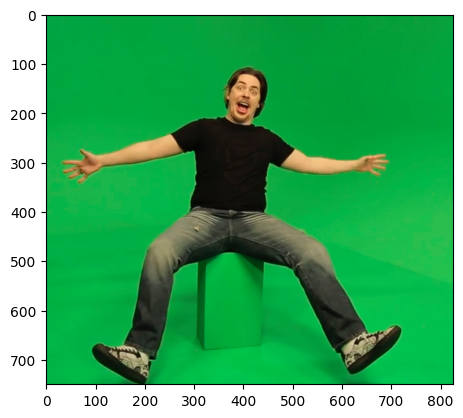

In [11]:
# Load foreground+green screen image

fg = cv.imread("green.png")
# note that the colors are swapped! OpenCV uses BGR by default
# while matplotlib imshow assumes RGB while plotting a MxNx3 array.
# we fix it with the function cv.cvtColor
fg = cv.cvtColor( fg, cv.COLOR_BGR2RGB ) # Change color space
plt.imshow( fg )


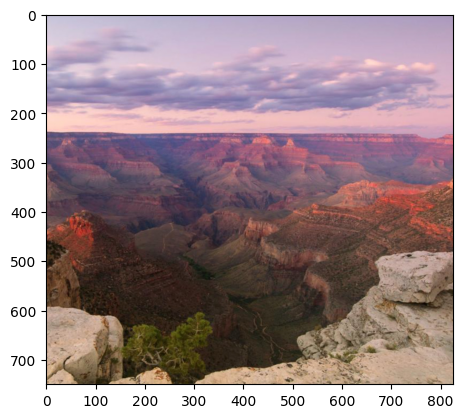

In [12]:
# Load background image

bg = cv.imread("background.jpg")
bg = cv.cvtColor( bg, cv.COLOR_BGR2RGB )
plt.imshow( bg )

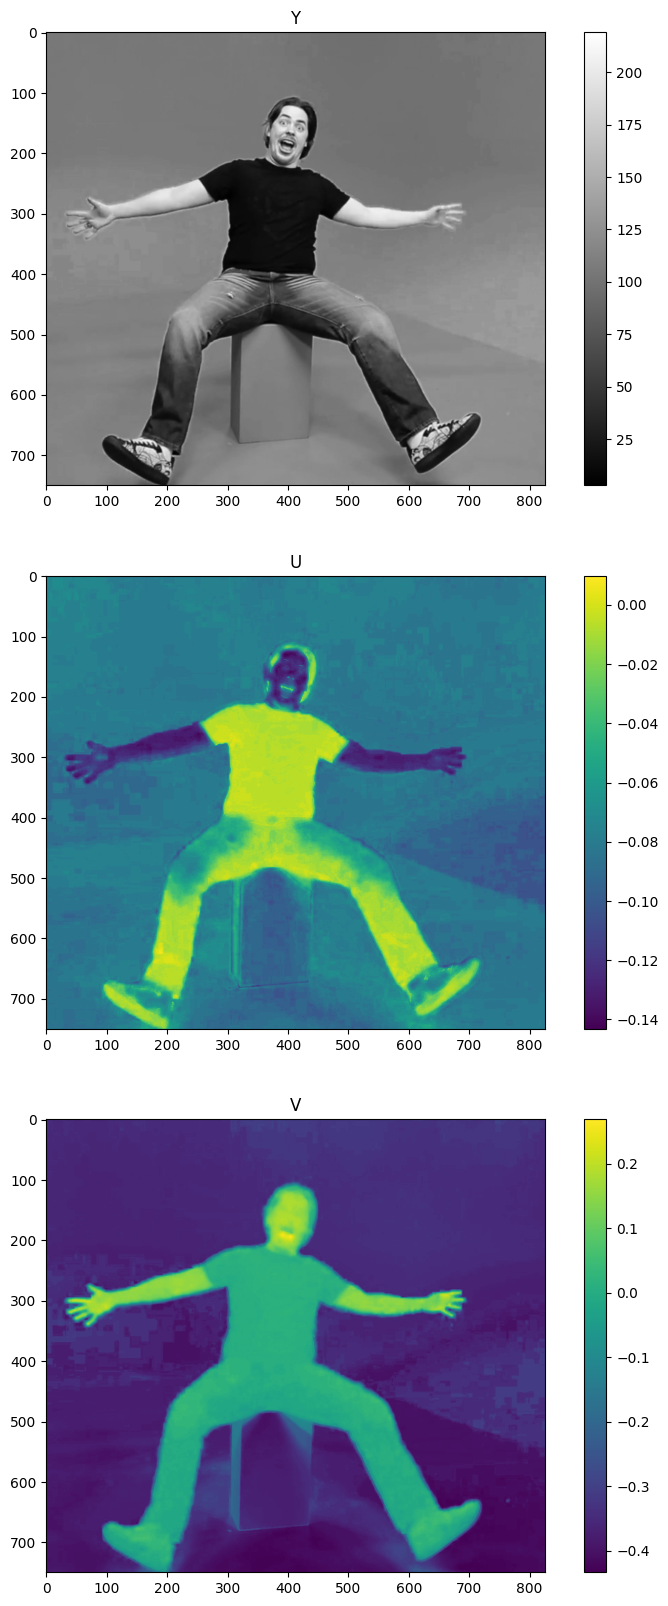

In [24]:
# Convert to YUV
fg_yuv = cv.cvtColor( fg , cv.COLOR_RGB2YUV)

UV = fg_yuv[:,:,1:3] / 255.0 - 0.5  # Normalize UV channels between [-0.5 ... 0.5]
           
plt.figure( figsize=(10,20) ) 

plt.subplot(3,1,1)
plt.imshow( fg_yuv[:,:,0], cmap="gray" ) 
plt.title("Y")
plt.colorbar()
plt.subplot(3,1,2)
plt.imshow( UV[:,:,0] )
plt.title("U")
plt.colorbar()
plt.subplot(3,1,3)
plt.imshow( UV[:,:,1] )
plt.title("V")
plt.colorbar()


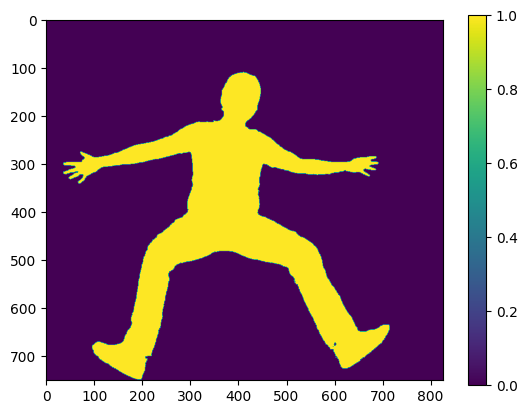

In [25]:
def chroma_distance( UV, u, v ):
    return np.sqrt( (UV[:,:,0]-u)**2 + (UV[:,:,1]-v)**2 )

mask = chroma_distance( UV, -0.4, -0.4  )
plt.imshow( mask>0.5 )
plt.colorbar()

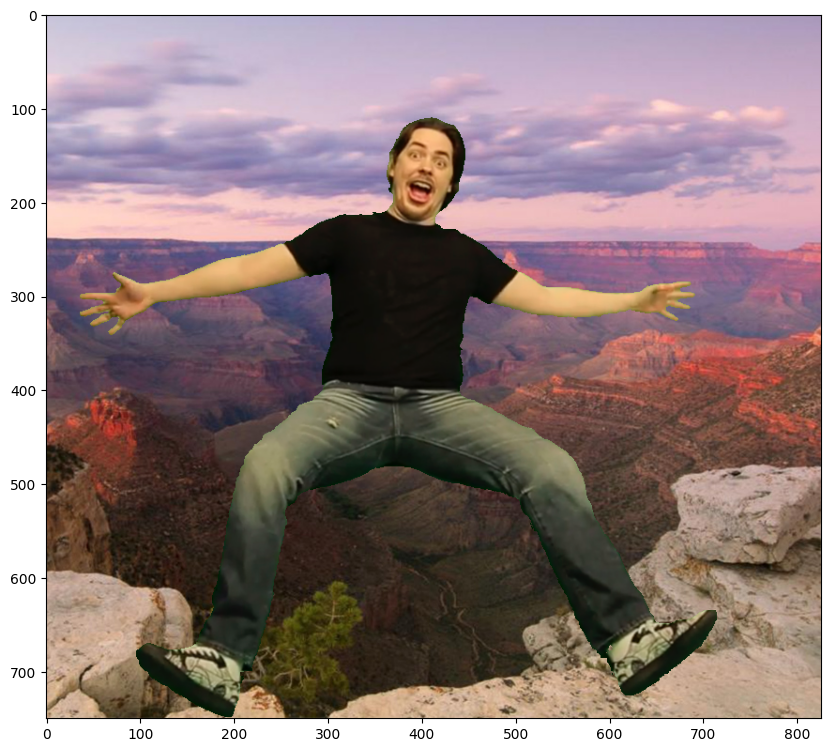

In [29]:

mask_bin = mask<0.5 # Would be better to use a "soft" mask
# This mas is an hard one, either 0 or 1, thus creates artifacts on the edges

comp = bg*np.expand_dims(mask_bin,axis=-1) + fg*np.expand_dims( 1-mask_bin, axis=-1)    
    

plt.figure( figsize=(10,10))
plt.imshow( comp );

In [16]:
from ipywidgets import interact, widgets

def chroma_key_compositing( utarget,vtarget,threshold ):
    mask = chroma_distance( UV, utarget, vtarget  )
    mask_bin = mask<threshold
    
    comp = bg*np.expand_dims(mask_bin,axis=-1) + fg*np.expand_dims( 1-mask_bin, axis=-1)    
    plt.figure( figsize=(9,9))
    plt.imshow( comp.astype(np.uint8) );

interact( chroma_key_compositing, threshold=(0.0,1.0,0.1), utarget=(-0.5,0.5,0.05), vtarget=(-0.5,0.5,0.05)  )

interactive(children=(FloatSlider(value=0.0, description='utarget', max=0.5, min=-0.5, step=0.05), FloatSlider…

<function __main__.chroma_key_compositing(utarget, vtarget, threshold)>